<a href="https://colab.research.google.com/github/XiChenn/Implement-ML-Algo/blob/main/Implement_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network with Python

Starting small, then growing, is a wise approach to building computer code

## The Skeleton Code

### Neural network class functions:

- **initialization** - to
set the number of input, hidden and output nodes
- **fit** - refine
the weights after being given a training set example to learn from (train a model)
- **predict** - give
an answer from the output nodes after being given an input

### Neural network architecture review

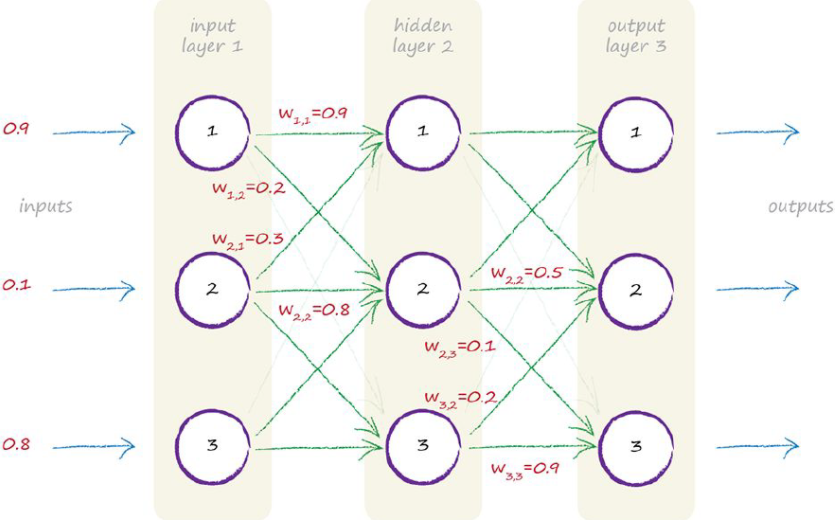

### Skeleton Code for NeuralNetwork class

In [1]:
# Neural Network class definition
class NeuralNetwork:

  # Initialize the Neural Network - set the number of input, hidden and output nodes
  def __init__(self):
    pass

  # Train(fit) the Neural Network - Refine the weights after being given a training set example to learn from (train a model)
  def fit(self):
    pass

  # Predict - Give an answer from the output nodes after being given an input
  def predict(self):
    pass

## Initialize the Neural Network

- Define the shape and the size of the neural network
- Pass a learning rate

### Implementation

In [2]:
# Neural Network class definition
class NeuralNetwork:

  # Initialize the Neural Network - set the number of input, hidden and output nodes
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate

  # Train(fit) the Neural Network - Refine the weights after being given a training set example to learn from (train a model)
  def fit():
    pass

  # Predict - Give an answer from the output nodes after being given an input
  def predict():
    pass

### Test & Demo

In [3]:
nn = NeuralNetwork(input_nodes=3, hidden_nodes=3, output_nodes=3, learning_rate=0.3)

## Weights - The Heart of the Network

- Calculate the signal being fed forward
- Calculate the error as it's propagated backwards

### Weights can be expressed as a matrix

- A matrix for the weights for links between the input and hidden layers, **W**<sub>input_hidden</sub> , of size
(**hidden_nodes** by **input_nodes**).
- And another matrix for the links between the hidden and output layers, **W** <sub>hidden_output</sub>, of
size (**output_nodes** by **hidden_nodes**).
Note: the matrix is of size (**hidden_nodes** by **input_nodes**), not the other way around (Why?).

#### Weight matrix recap

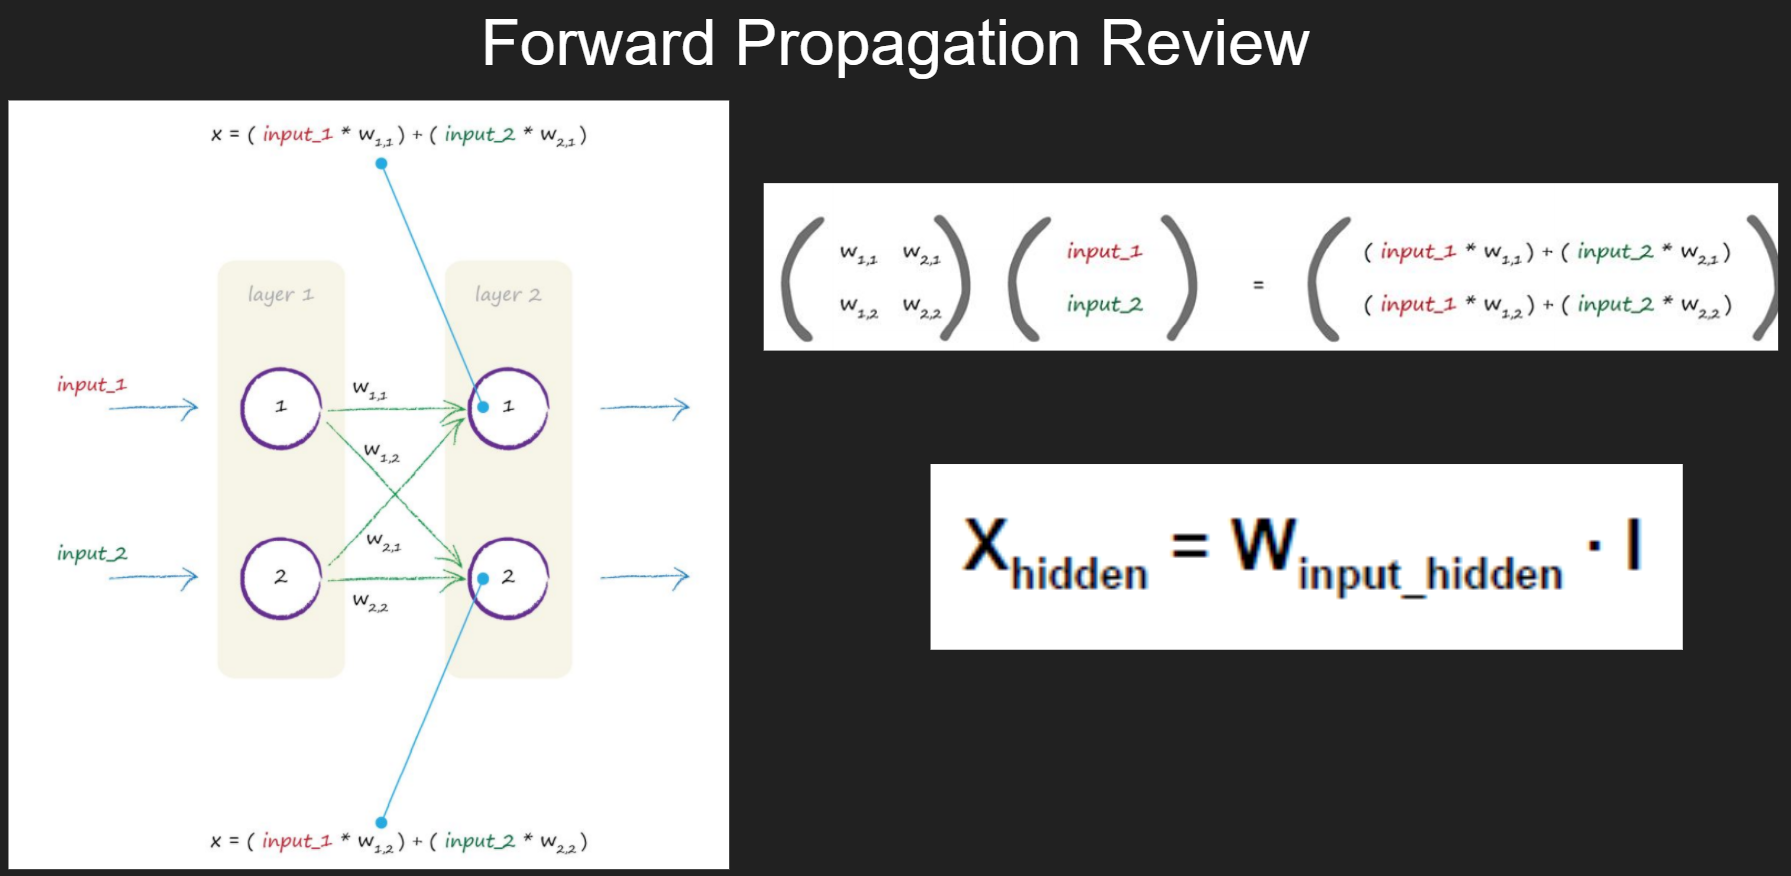

#### the initial values of the link weights should be small and random

In [4]:
import numpy as np
np.random.rand(3, 2)  # rows * columns

array([[0.66641194, 0.24761211],
       [0.89341144, 0.52284914],
       [0.43968324, 0.88871186]])

### Implementation

In [5]:
import numpy as np

# Neural Network class definition
class NeuralNetwork:

  # Initialize the Neural Network - set the number of input, hidden and output nodes
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate

    # Weights inside W_input_hidden and W_hidden_output matrices are w_i_j, where link is from node i to node j in the next layer 
    self.W_input_hidden = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
    self.W_hidden_output = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5

  # Train(fit) the Neural Network - Refine the weights after being given a training set example to learn from (train a model)
  def fit():
    pass

  # Predict - Give an answer from the output nodes after being given an input
  def predict():
    pass

### Test & Demo

In [6]:
nn = NeuralNetwork(3, 4, 3, 0.3)

In [7]:
nn.W_input_hidden

array([[-0.4182038 ,  0.44986071,  0.03938856],
       [-0.34366826, -0.23352811, -0.45764615],
       [-0.2717865 , -0.12224934, -0.26472128],
       [ 0.43014565,  0.17348032, -0.08427797]])

In [8]:
nn.W_hidden_output

array([[-0.44972171,  0.45071965, -0.45574433,  0.26084765],
       [ 0.12743931,  0.18651737, -0.22795516,  0.42328292],
       [-0.10360999, -0.49123286,  0.04104264, -0.03685726]])

## Predicting the Network (Querying the Network)

It sounds logical to start working on the code that trains the neural network next, by fleshing out
the currently empty fit() function. We’ll delay doing that, and instead, work on the simpler
predict() function. This will give us more time to gradually build confidence and get some practice
at using both Python and these weight matrices inside the neural network object.

### Calculate the hidden input matrix **X**<sub>hidden</sub>

**X**<sub>hidden</sub> = **W**<sub>input_hidden</sub> **·** **I**

In [9]:
I = [[1], [2], [3]]  # I: 3 X 1 matrix
X_hidden = np.dot(nn.W_input_hidden, I)

In [10]:
print(X_hidden)

[[ 0.59968328]
 [-2.18366293]
 [-1.31044902]
 [ 0.52427237]]


### Calculate the hidden output matrix **O**<sub>hidden</sub>

**O**<sub>hidden</sub> = sigmoid(**X**<sub>hidden</sub>)

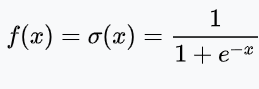

In [11]:
import math
math.exp(2)

7.38905609893065

In [12]:
import numpy as np
np.exp(2)

7.38905609893065

In [13]:
np.exp([[1, 2, 3], [4, 5, 6]])

array([[  2.71828183,   7.3890561 ,  20.08553692],
       [ 54.59815003, 148.4131591 , 403.42879349]])

#### Implement sigmoid function

In [14]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Sigmoid(x')

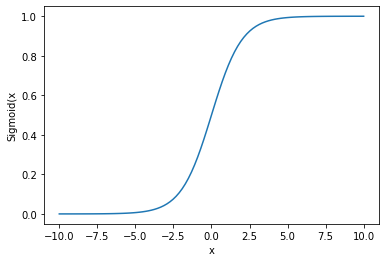

In [16]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(x")

#### Activation function using anonymous sigmoid function

In [17]:
# activation function is the sigmoid function
nn.activation_function = lambda x: 1 / (1 + np.exp(-x))

#### hidden output matrix **O**<sub>hidden</sub>

In [18]:
# calculate the signals emerging from hidden layer
O_hidden = nn.activation_function(X_hidden)

In [19]:
print(O_hidden)

[[0.64558384]
 [0.10122719]
 [0.21241172]
 [0.62814625]]


### Calculate final output matrix

In [20]:
# calculate signals into final output layer
X_output = np.dot(nn.W_hidden_output, O_hidden)

# calculate the signals emerging from final output layer
O_output = nn.activation_function(X_output)

In [21]:
print(X_output)

[[-0.17766295]
 [ 0.31861662]
 [-0.13104886]]


In [22]:
print(O_output)

[[0.45570072]
 [0.57898708]
 [0.46728459]]


### Convert the list to a transposed numpy array

In [23]:
input_list = [1, 2]
I = np.array(input_list, ndmin=2).T
print(I)

[[1]
 [2]]


## The Code Thus Far

In [24]:
import numpy as np

# Neural Network class definition
class NeuralNetwork:

  # Initialize the Neural Network - set the number of input, hidden and output nodes
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate

    # Weights inside W_input_hidden and W_hidden_output matrices are w_i_j, where link is from node i to node j in the next layer 
    self.W_input_hidden = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
    self.W_hidden_output = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5

    # activation function is the sigmoid function
    self.activation_function = lambda x: 1 / (1 + np.exp(-x))

  # Train(fit) the Neural Network - Refine the weights after being given a training set example to learn from (train a model)
  def fit():
    pass

  # Predict - Give an answer from the output nodes after being given an input
  def predict(self, input_list):
    # convert input list to 2d array
    I = np.array(input_list, ndmin=2).T

    # calculate signals into hidden layer
    X_hidden = np.dot(self.W_input_hidden, I)

    # calculate the signals emerging from hidden layer
    O_hidden = self.activation_function(X_hidden)

    # calculate signals into final output layer
    X_output = np.dot(self.W_hidden_output, O_hidden)

    # calculate the signals emerging from final output layer
    O_output = self.activation_function(X_output)

    return O_output


It is worth briefly noting the predict() function only needs the **input_list** . It doesn’t need any other input.

### Test & Demo

In [25]:
nn = NeuralNetwork(3, 4, 3, 0.1)

In [26]:
nn.predict([0.1, -0.2, 0.3])

array([[0.57313937],
       [0.42392725],
       [0.51751087]])

## Fit the Network (Train the Network)

### Finding Patterns

Traditional programming:

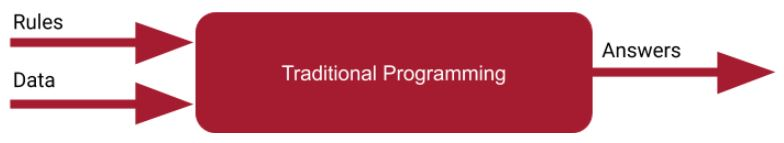

Machine Learning:

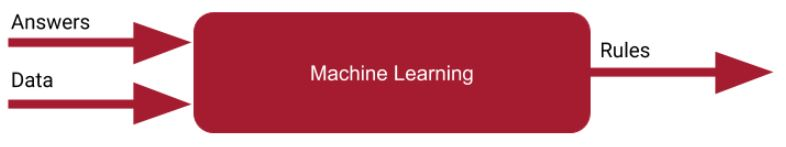

Machine Learning Training Process

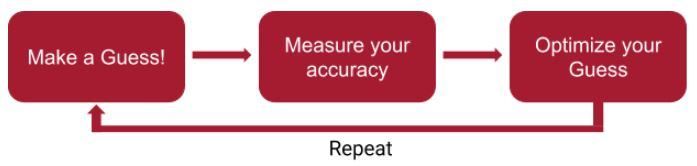

Two phases to training:
- Working out the output for a given training esxample (forward propagation: as predict() does)
- Taking this calculated output, comparing it with the desired otput and using the difference to guide the updating of the network weights(backpropagation)

### Refacotor the code a little bit

In [27]:
import numpy as np

# Neural Network class definition
class NeuralNetwork:

  # Initialize the Neural Network - set the number of input, hidden and output nodes
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate

    # Weights inside W_input_hidden and W_hidden_output matrices are w_i_j, where link is from node i to node j in the next layer 
    self.W_input_hidden = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
    self.W_hidden_output = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5

    # activation function is the sigmoid function
    self.activation_function = lambda x: 1 / (1 + np.exp(-x))

  # Forward propagation private method
  def __forward_propagation(self, I):
    # calculate signals into hidden layer
    X_hidden = np.dot(self.W_input_hidden, I)

    # calculate the signals emerging from hidden layer
    O_hidden = self.activation_function(X_hidden)

    # calculate signals into final output layer
    X_output = np.dot(self.W_hidden_output, O_hidden)

    # calculate the signals emerging from final output layer
    O_output = self.activation_function(X_output)

    return O_hidden, O_output

  # Train(fit) the Neural Network - Refine the weights after being given a training set example to learn from (train a model)
  def fit(self):
    pass

  # Predict - Give an answer from the output nodes after being given an input
  def predict(self, input_list):
    # convert input list to 2D array
    I = np.array(input_list, ndmin=2).T

    O_hidden, O_output = self.__forward_propagation(I)
    return O_output

In [28]:
nn = NeuralNetwork(3, 4, 3, 0.1)
nn.predict([1, 2, 3])

array([[0.55298466],
       [0.48329396],
       [0.45359892]])

### fit() method skeleton code

In [29]:
def fit(self, input_list, target_list):
  # convert input and target list to 2D array
  inputs = np.array(input_list, ndmin=2).T
  targets = np.array(target_list, ndmin=2).T

  hidden_output, final_output = self.__forward_propagation(inputs)

  # Error is the (target - actual)
  output_errors = targets - final_output

### Hidden layer error

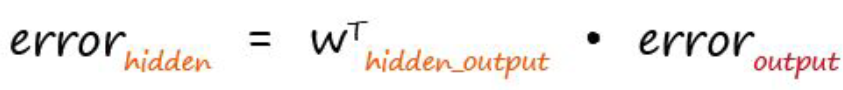

Quick Recap:

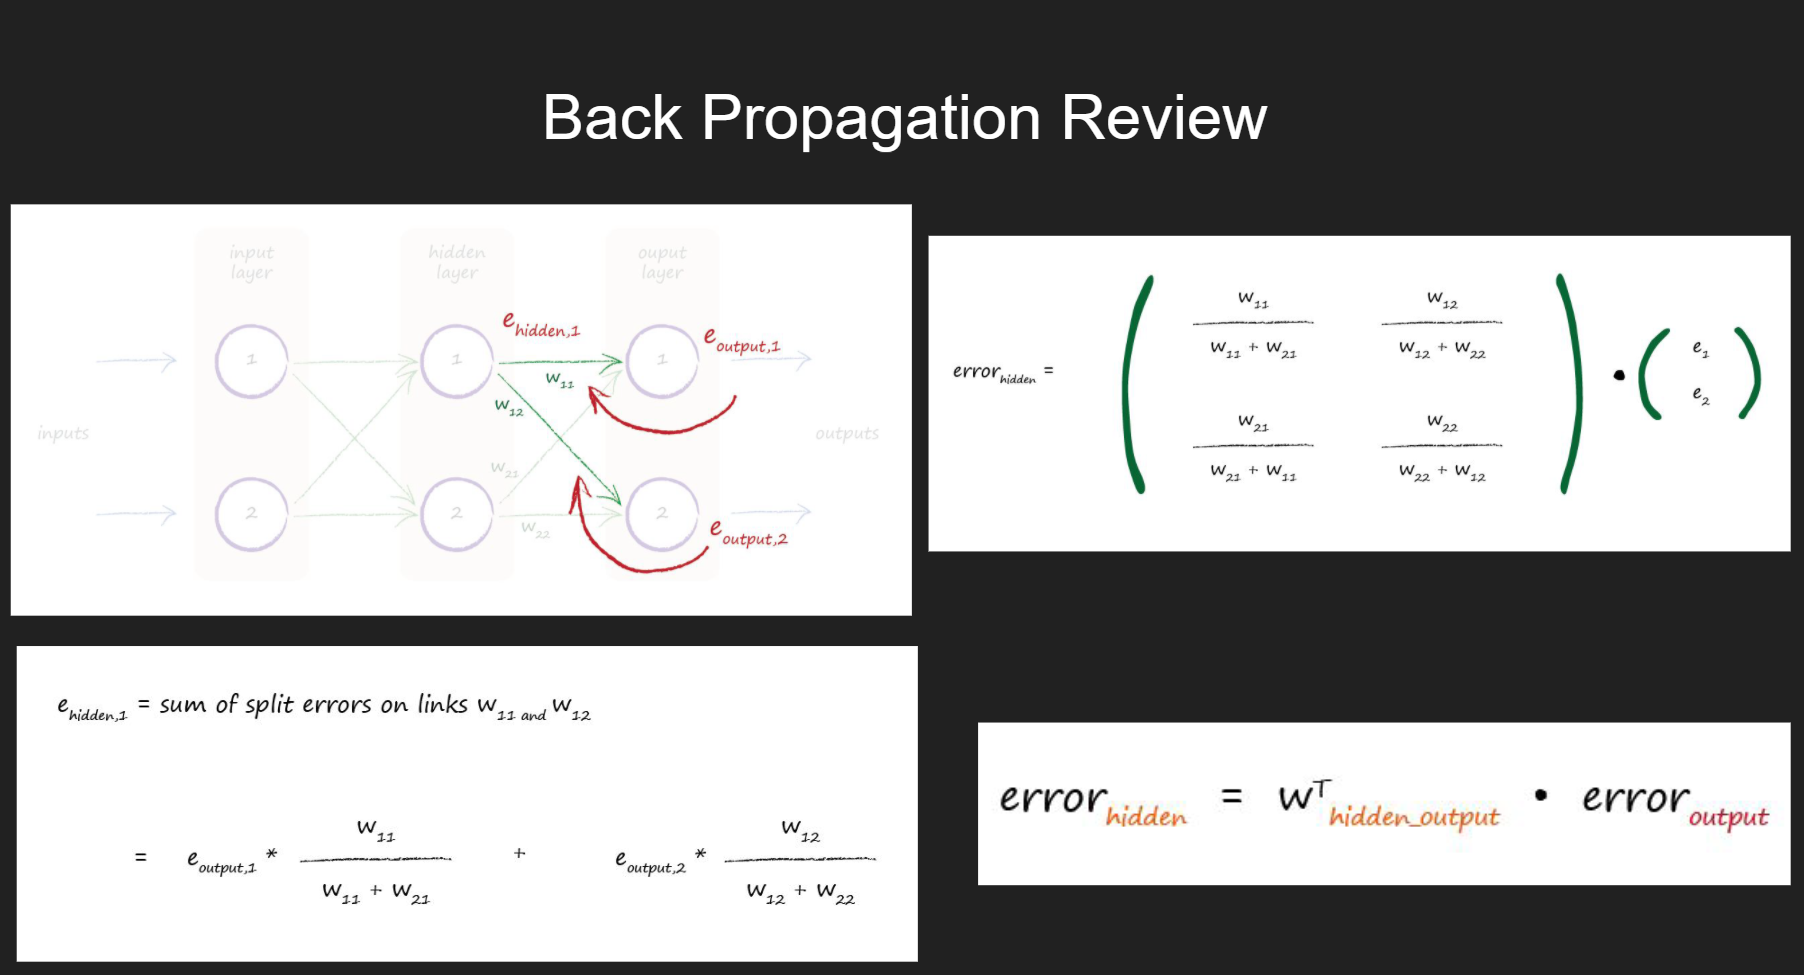

In [30]:
def fit(self, input_list, target_list):
  # convert input and target list to 2D array
  inputs = np.array(input_list, ndmin=2).T
  targets = np.array(target_list, ndmin=2).T

  hidden_output, final_output = self.__forward_propagation(inputs)

  # Error is the (target - actual)
  output_errors = targets - final_output

  # Hidden layer error is the output_errors, split by weights, recombined at hidden nodes
  hidden_erors = np.dot(self.W_hidden_output.T, output_errors)

### Updating Weights

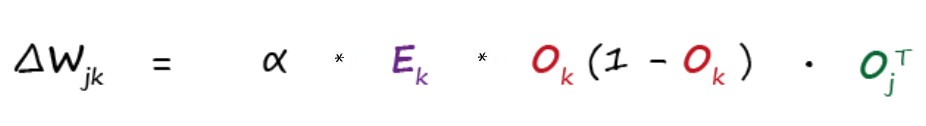

In [31]:
def fit(self, input_list, target_list):
  # convert input and target list to 2D array
  inputs = np.array(input_list, ndmin=2).T
  targets = np.array(target_list, ndmin=2).T

  hidden_output, final_output = self.__forward_propagation(inputs)

  # Error is the (target - actual)
  output_errors = targets - final_output

  # Hidden layer error is the output_errors, split by weights, recombined at hidden nodes
  hidden_errors = np.dot(self.W_hidden_output.T, output_errors)

  # Update the weights for the links between the hidden and output layers
  self.W_hidden_output += np.dot(self.learning_rate * output_errors * final_output * (1.0 - final_output), hidden_output.T)

  # Update the weights for the links between the input and hidden layers
  self.W_input_hidden += np.dot(self.learning_rate * hidden_errors * hidden_output * (1.0 - hidden_output), inputs.T)

Quick Recap:

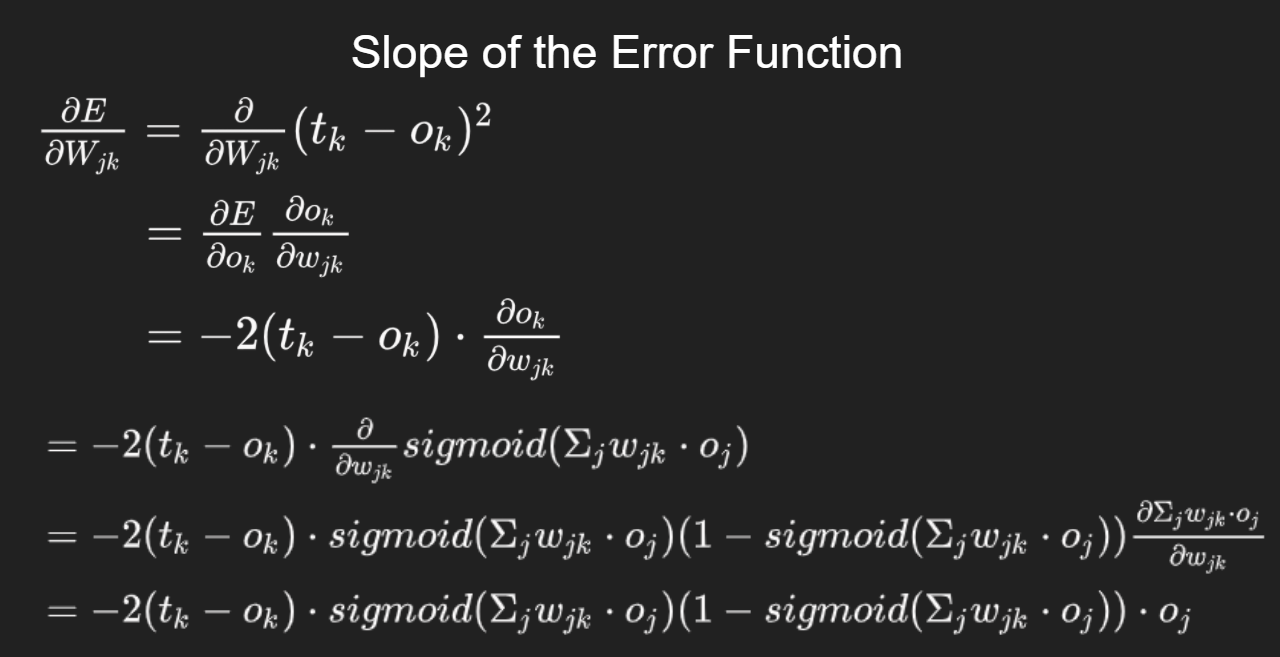

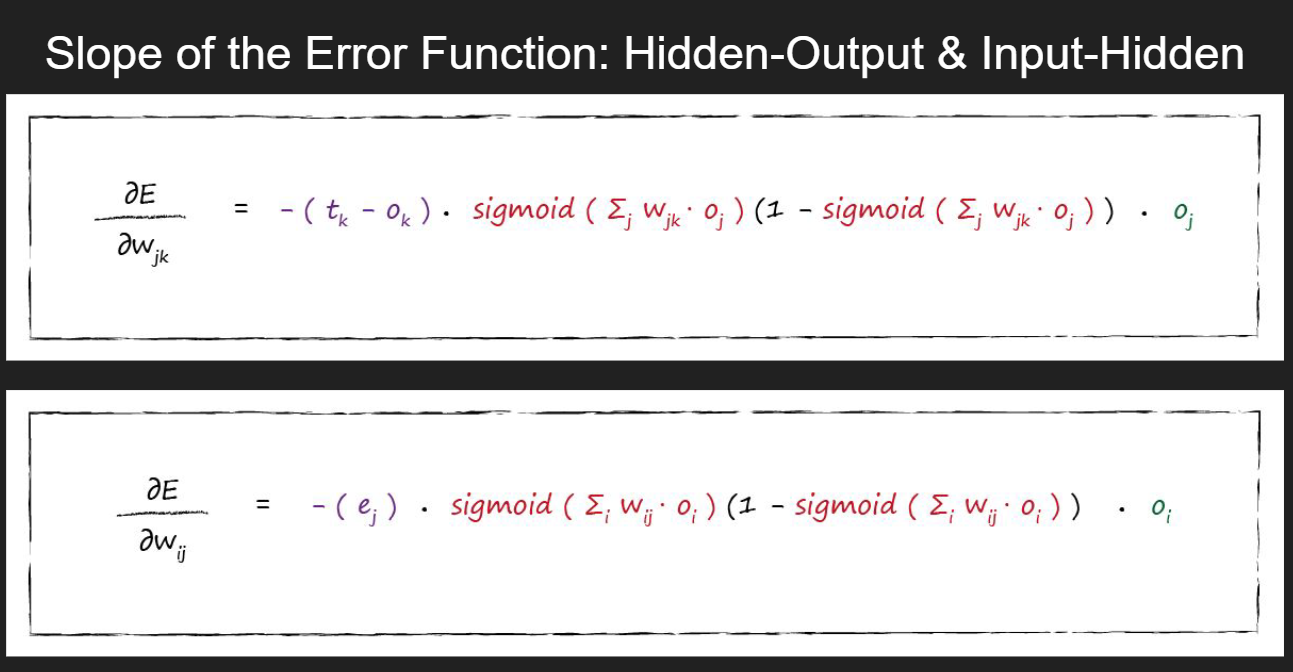

## The Code Thus Far

In [32]:
import numpy as np

# Neural Network class definition
class NeuralNetwork:

  # Initialize the Neural Network - set the number of input, hidden and output nodes
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate

    # Weights inside W_input_hidden and W_hidden_output matrices are w_i_j, where link is from node i to node j in the next layer 
    self.W_input_hidden = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
    self.W_hidden_output = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5

    # activation function is the sigmoid function
    self.activation_function = lambda x: 1 / (1 + np.exp(-x))

  # Forward propagation private method
  def __forward_propagation(self, I):
    # calculate signals into hidden layer
    X_hidden = np.dot(self.W_input_hidden, I)

    # calculate the signals emerging from hidden layer
    O_hidden = self.activation_function(X_hidden)

    # calculate signals into final output layer
    X_output = np.dot(self.W_hidden_output, O_hidden)

    # calculate the signals emerging from final output layer
    O_output = self.activation_function(X_output)

    return O_hidden, O_output

  # Train(fit) the Neural Network - Refine the weights after being given a training set example to learn from (train a model)
  def fit(self, input_list, target_list):
    # convert input and target list to 2D array
    inputs = np.array(input_list, ndmin=2).T
    targets = np.array(target_list, ndmin=2).T

    hidden_output, final_output = self.__forward_propagation(inputs)

    # Error is the (target - actual)
    output_errors = targets - final_output

    # Hidden layer error is the output_errors, split by weights, recombined at hidden nodes
    hidden_errors = np.dot(self.W_hidden_output.T, output_errors)

    # Update the weights for the links between the hidden and output layers
    self.W_hidden_output += np.dot(self.learning_rate * output_errors * final_output * (1.0 - final_output), hidden_output.T)

    # Update the weights for the links between the input and hidden layers
    self.W_input_hidden += np.dot(self.learning_rate * hidden_errors * hidden_output * (1.0 - hidden_output), inputs.T)

  # Predict - Give an answer from the output nodes after being given an input
  def predict(self, input_list):
    # convert input list to 2D array
    I = np.array(input_list, ndmin=2).T

    O_hidden, O_output = self.__forward_propagation(I)
    return O_output

### Test & Demo

In [33]:
nn = NeuralNetwork(3, 4, 3, 0.1)
nn.predict([0.1, -0.2, 0.3])

array([[0.59465846],
       [0.50691862],
       [0.52883385]])

In [34]:
nn.fit([0.1, -0.2, 0.3], [3, 2, 1])

In [35]:
nn.predict([0.1, -0.2, 0.3])

array([[0.60901663],
       [0.51656606],
       [0.53187272]])

## The MNIST Dataset of H andwritten Numbers

## Credit

- The contents are adapted from Tariq Rashid's ["Make Your Own Neural Network](https://www.amazon.com/Make-Your-Own-Neural-Network-ebook/dp/B01EER4Z4G)".
- https://www.edx.org/course/fundamentals-of-tinyml